In [1]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')


from pandas import DataFrame
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline
color = sns.color_palette()
from IPython.display import display
from scipy.stats import norm, skew
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from collections import defaultdict

In [48]:
!!pip install imblearn

['Requirement already satisfied: imblearn in c:\\users\\lenovo\\microsoft\\new folder\\lib\\site-packages (0.0)',
 'Requirement already satisfied: imbalanced-learn in c:\\users\\lenovo\\microsoft\\new folder\\lib\\site-packages (from imblearn) (0.6.1)',
 'Requirement already satisfied: joblib>=0.11 in c:\\users\\lenovo\\microsoft\\new folder\\lib\\site-packages (from imbalanced-learn->imblearn) (0.13.2)',
 'Requirement already satisfied: numpy>=1.11 in c:\\users\\lenovo\\microsoft\\new folder\\lib\\site-packages (from imbalanced-learn->imblearn) (1.16.4)',
 'Requirement already satisfied: scikit-learn>=0.22 in c:\\users\\lenovo\\microsoft\\new folder\\lib\\site-packages (from imbalanced-learn->imblearn) (0.22)',
 'Requirement already satisfied: scipy>=0.17 in c:\\users\\lenovo\\microsoft\\new folder\\lib\\site-packages (from imbalanced-learn->imblearn) (1.2.1)']

In [2]:
!! pip install xlrd

['Requirement already satisfied: xlrd in e:\\new folder\\envs\\myenv\\lib\\site-packages (1.2.0)']

In [3]:
!! pip install openpyxl

['Requirement already satisfied: openpyxl in e:\\new folder\\envs\\myenv\\lib\\site-packages (3.0.0)',
 'Requirement already satisfied: et-xmlfile in e:\\new folder\\envs\\myenv\\lib\\site-packages (from openpyxl) (1.0.1)',
 'Requirement already satisfied: jdcal in e:\\new folder\\envs\\myenv\\lib\\site-packages (from openpyxl) (1.4.1)']

In [7]:
from imblearn.over_sampling import SMOTE

In [2]:
import pprint
import operator

import numpy as np
import pandas as pd


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.base import BaseEstimator, ClassifierMixin

from imblearn.over_sampling import SMOTE

#import the necessary modelling algos.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV

#preprocess.
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder,OneHotEncoder

# Export Data to Excel

In [25]:
dt = DataFrame(HR, columns=['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'exp_in_company', 'work_accident', 'left',
       'promotion_last_5years', 'role_RandD', 'role_accounting', 'role_hr',
       'role_management', 'role_marketing', 'role_product_mng', 'role_sales',
       'role_support', 'role_technical', 'salary_low', 'salary_medium',
       'Intercept'])

In [26]:
export_excel = dt.to_excel (r'C:\Users\Z\Desktop\export_dataframe.xlsx', index = None, header=True) #Don't forget to add '

# HR NEW 18/11

In [7]:
HR = pd.read_excel("C:\\Users\\LENOVO\\Desktop\\python\\HR Analytics Python.xlsx")

In [8]:
print(HR.shape)
HR.head()

(15000, 10)


,satisfaction_level,last_evaluation,average_monthly_hours,exp_in_company,work_accident,left,promotion_last_5years,role,salary,ProjectCat
0,0.38,0.53,157,3,0,1,0,sales,low,Low Project
1,0.80,0.86,262,6,0,1,0,sales,medium,Medium Project
2,0.11,0.88,272,4,0,1,0,sales,medium,High Project
3,0.72,0.87,223,5,0,1,0,sales,low,Medium Project
4,0.37,0.52,159,3,0,1,0,sales,low,Low Project


# Encoding Dataset

In [13]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Create a label encoder object
le = LabelEncoder()

In [14]:
# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
for col in dt.columns[1:]:
    if HR[col].dtype == 'object':
        if len(list(dt[col].unique())) <= 2:
            le.fit(dt[col])
            HR[col] = le.transform(HR[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

0 columns were label encoded.


In [15]:
# convert rest of categorical variable into dummy
HR = pd.get_dummies(HR, drop_first=True)

print(HR.shape)
HR.head()

(15000, 20)


,satisfaction_level,last_evaluation,average_monthly_hours,exp_in_company,work_accident,left,promotion_last_5years,role_RandD,role_accounting,role_hr,role_management,role_marketing,role_product_mng,role_sales,role_support,role_technical,salary_low,salary_medium,ProjectCat_Low Project,ProjectCat_Medium Project
0,0.38,0.53,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0
1,0.80,0.86,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1
2,0.11,0.88,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,0.72,0.87,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1
4,0.37,0.52,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0


In [16]:
HR = HR.drop(['number_project'], axis=1)
HR = HR.drop(['names'], axis=1)

In [6]:
Q1 = HR.quantile(0.25)
Q3 = HR.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

satisfaction_level        0.38
last_evaluation           0.31
average_monthly_hours    89.00
exp_in_company            1.00
work_accident             0.00
left                      0.00
promotion_last_5years     0.00
dtype: float64


In [37]:
print(HR < (Q1 - 1.5 * IQR)) |(HR > (Q3 + 1.5 * IQR))

       satisfaction_level  last_evaluation  average_monthly_hours  \
0                   False            False                  False   
1                   False            False                  False   
2                   False            False                  False   
3                   False            False                  False   
4                   False            False                  False   
...                   ...              ...                    ...   
14995               False            False                  False   
14996               False            False                  False   
14997               False            False                  False   
14998               False            False                  False   
14999               False            False                  False   

       exp_in_company  work_accident   left  promotion_last_5years  \
0               False          False  False                  False   
1               False          

TypeError: cannot compare a dtyped [bool] array with a scalar of type [NoneType]

In [27]:
print(HR['exp_in_company'].skew())
HR['exp_in_company'].describe()

1.853051580278616


count    15000.000000
mean         3.498333
std          1.460139
min          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: exp_in_company, dtype: float64

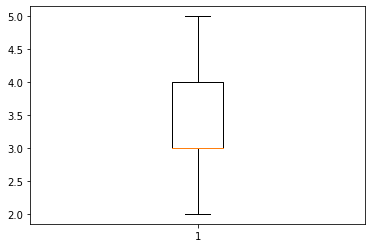

In [40]:
plt.boxplot(HR["exp_in_company"])
plt.show()

# Exp in company - outliers

in this technique, we will do the flooring (e.g., the 10th percentile) for the lower values and capping (e.g., the 90th percentile) for the higher values. The lines of code below print the 10th and 90th percentiles of the variable 'exp in company', respectively. These values will be used for quantile-based flooring and capping.

In [5]:
print(HR['exp_in_company'].quantile(0.10))
print(HR['exp_in_company'].quantile(0.90))

2.0
5.0


In [6]:
HR["exp_in_company"] = np.where(HR["exp_in_company"] <2.0, 2.0,HR['exp_in_company'])
HR["exp_in_company"] = np.where(HR["exp_in_company"] >5.0, 5.0,HR['exp_in_company'])
print(HR['exp_in_company'].skew())

0.3973687956358701


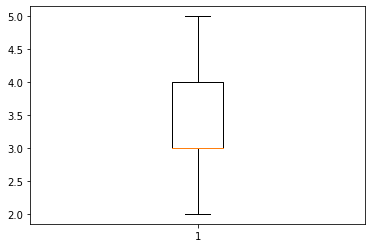

In [7]:
plt.boxplot(HR["exp_in_company"])
plt.show()

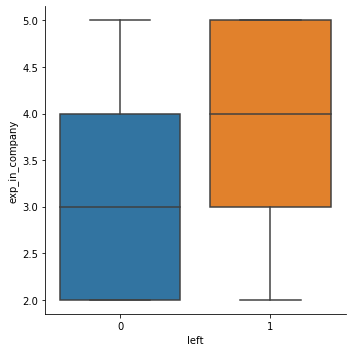

In [7]:
sns.factorplot(data=HR,y='exp_in_company',x='left',size=5,aspect=1,kind='box')

In [32]:
# Correlations of numerical values
HR.corr()['left'].sort_values()

satisfaction_level      -0.388225
work_accident           -0.154653
promotion_last_5years   -0.061799
last_evaluation          0.006701
average_monthly_hours    0.071353
exp_in_company           0.275168
left                     1.000000
Name: left, dtype: float64

In [15]:
#Encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Create a label encoder object
le = LabelEncoder()

In [16]:
# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
for col in HR.columns[1:]:
    if HR[col].dtype == 'object':
        if len(list(HR[col].unique())) <= 2:
            le.fit(HR[col])
            HR[col] = le.transform(HR[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

0 columns were label encoded.


In [17]:
# convert rest of categorical variable into dummy
HR = pd.get_dummies(HR, drop_first=True)

print(HR.shape)
HR.head()

(15000, 20)


,satisfaction_level,last_evaluation,average_monthly_hours,exp_in_company,work_accident,left,promotion_last_5years,role_RandD,role_accounting,role_hr,role_management,role_marketing,role_product_mng,role_sales,role_support,role_technical,salary_low,salary_medium,ProjectCat_Low Project,ProjectCat_Medium Project
0,0.38,0.53,157,3.0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0
1,0.80,0.86,262,5.0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1
2,0.11,0.88,272,4.0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,0.72,0.87,223,5.0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1
4,0.37,0.52,159,3.0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0


In [36]:
HR.columns

Index(['satisfaction_level', 'last_evaluation', 'average_monthly_hours',
       'exp_in_company', 'work_accident', 'left', 'promotion_last_5years',
       'role_RandD', 'role_accounting', 'role_hr', 'role_management',
       'role_marketing', 'role_product_mng', 'role_sales', 'role_support',
       'role_technical', 'salary_low', 'salary_medium',
       'projectCat_Low Project', 'projectCat_Medium Project'],
      dtype='object')

In [18]:
from sklearn.preprocessing import StandardScaler
#Feature Scaling
scaler=StandardScaler()
scaled_HR=scaler.fit_transform(HR.drop('left',axis=1))
X=scaled_HR
Y=HR['left'].as_matrix()

In [19]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=42)

In [20]:
oversampler=SMOTE(random_state=42)
x_train_smote,  y_train_smote = oversampler.fit_sample(x_train,y_train)

In [21]:
#create intercept column
HR['Intercept'] = 1.0
HR.head()

,satisfaction_level,last_evaluation,average_monthly_hours,exp_in_company,work_accident,left,promotion_last_5years,role_RandD,role_accounting,role_hr,...,role_marketing,role_product_mng,role_sales,role_support,role_technical,salary_low,salary_medium,projectCat_Low Project,projectCat_Medium Project,Intercept
0,0.38,0.53,157,3.0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,1.0
1,0.80,0.86,262,5.0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,1,1.0
2,0.11,0.88,272,4.0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1.0
3,0.72,0.87,223,5.0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,1.0
4,0.37,0.52,159,3.0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,1.0


In [41]:
HR.columns

Index(['satisfaction_level', 'last_evaluation', 'average_monthly_hours',
       'exp_in_company', 'work_accident', 'left', 'promotion_last_5years',
       'role_RandD', 'role_accounting', 'role_hr', 'role_management',
       'role_marketing', 'role_product_mng', 'role_sales', 'role_support',
       'role_technical', 'salary_low', 'salary_medium',
       'projectCat_Low Project', 'projectCat_Medium Project', 'Intercept'],
      dtype='object')

In [42]:
ind_vars = ['satisfaction_level', 'last_evaluation',
       'average_monthly_hours', 'exp_in_company', 'work_accident',
       'promotion_last_5years', 'role_RandD', 'role_accounting', 'role_hr',
       'role_management', 'role_marketing', 'role_product_mng', 'role_sales',
       'role_support', 'role_technical', 'salary_low', 'salary_medium',
       'projectCat_Low Project', 'projectCat_Medium Project', 'Intercept']

In [43]:
#define logistic regression
import statsmodels.api as sm
logit = sm.Logit(HR['left'], HR[ind_vars])

In [44]:
#fit the model
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.405757
         Iterations 7


In [45]:
#get fitted coef
coeff = result.params

#print coeff
print(result.summary2())
#result has more information

                              Results: Logit
Model:                 Logit               Pseudo R-squared:    0.261     
Dependent Variable:    left                AIC:                 12212.6977
Date:                  2019-12-11 23:10    BIC:                 12365.0138
No. Observations:      15000               Log-Likelihood:      -6086.3   
Df Model:              19                  LL-Null:             -8233.8   
Df Residuals:          14980               LLR p-value:         0.0000    
Converged:             1.0000              Scale:               1.0000    
No. Iterations:        7.0000                                             
--------------------------------------------------------------------------
                           Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------------
satisfaction_level        -3.0481   0.1080 -28.2340 0.0000 -3.2597 -2.8365
last_evaluation           -0.0905   0.1502  -0.6026 0.5

Role IT as REF, Salary High as ref, Project High as ref

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(x_train_smote, y_train_smote)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
predict_train = logreg.predict(x_train_smote)
predict_test = logreg.predict(x_test)

print("Accuracy on train is:",accuracy_score(y_train_smote,predict_train)*100,"%")
print("Accuracy on test is:",accuracy_score(y_test,predict_test)*100,"%")

Accuracy on train is: 82.54445279238668 %
Accuracy on test is: 78.84444444444443 %


In [40]:
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)*100,"%"))

Accuracy of logistic regression classifier on test set: 78.84


In [41]:
# Predicting the train set results
y_train_pred = logreg.predict(x_train_smote)
cm_train = confusion_matrix(y_train_smote, y_train_pred)

In [43]:
# Predicting the train set results
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train_smote, y_train_pred)
print(confusion_matrix)

[[6134 1852]
 [ 936 7050]]


In [49]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[2633  809]
 [ 143  915]]


precision:0.5307,
sensitivity:0.8648,
specificity:0.765,

In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.76      0.85      3442
           1       0.53      0.86      0.66      1058

    accuracy                           0.79      4500
   macro avg       0.74      0.81      0.75      4500
weighted avg       0.85      0.79      0.80      4500



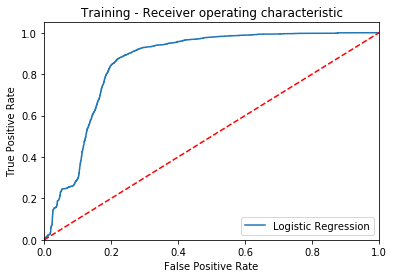

In [114]:
#Training
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_train_smote, logreg.predict(x_train_smote))
fpr, tpr, thresholds = roc_curve(y_train_smote, logreg.predict_proba(x_train_smote)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Training - Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

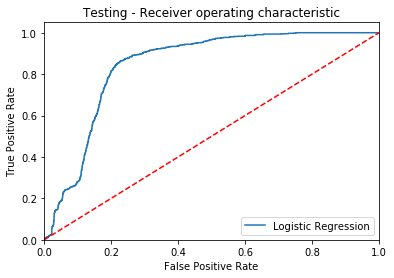

In [115]:
#Testing
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Testing - Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [65]:
HR.columns

Index(['satisfaction_level', 'last_evaluation', 'average_monthly_hours',
       'exp_in_company', 'work_accident', 'left', 'promotion_last_5years',
       'role_RandD', 'role_accounting', 'role_hr', 'role_management',
       'role_marketing', 'role_product_mng', 'role_sales', 'role_support',
       'role_technical', 'salary_low', 'salary_medium',
       'projectCat_Low Project', 'projectCat_Medium Project', 'Intercept'],
      dtype='object')

In [23]:
varnames = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'exp_in_company', 'work_accident', 'left',
       'promotion_last_5years', 'role_RandD', 'role_accounting', 'role_hr',
       'role_management', 'role_marketing', 'role_product_mng', 'role_sales',
       'role_support', 'role_technical', 'salary_low', 'salary_medium',
       'projectCat_Low Project', 'projectCat_Medium Project']

In [24]:
lr = LogisticRegression(C=1e5)
lr.fit(X, Y)

print(lr.coef_) # returns a matrix of weights (coefficients)

[[-7.46310707e-01  1.86988281e-01 -1.67620567e+00  2.28911123e-01
   4.12715155e-01 -5.34145155e-01 -2.05716911e-01 -7.17094385e-02
   3.90497081e-02  8.48019531e-02 -5.71179084e-02  3.81033339e-02
  -4.25772356e-04  5.47738420e-02  8.05935052e-02  8.88079116e-02
   9.49580084e-01  6.88932904e-01 -2.48435047e+00 -1.72992416e+00]]


In [25]:
np.hstack((lr.intercept_[:,None], lr.coef_))

array([[-1.66274019e+00, -7.46310707e-01,  1.86988281e-01,
        -1.67620567e+00,  2.28911123e-01,  4.12715155e-01,
        -5.34145155e-01, -2.05716911e-01, -7.17094385e-02,
         3.90497081e-02,  8.48019531e-02, -5.71179084e-02,
         3.81033339e-02, -4.25772356e-04,  5.47738420e-02,
         8.05935052e-02,  8.88079116e-02,  9.49580084e-01,
         6.88932904e-01, -2.48435047e+00, -1.72992416e+00]])

# Decision Tree

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.externals.six import StringIO 
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, roc_curve, auc
from sklearn.model_selection import cross_val_score
from IPython.display import Image 
import pandas as pd
import numpy as np

In [72]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train_smote, y_train_smote)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [73]:
t = dtree.fit(x_train_smote,y_train_smote)
print("Decision Tree Model Score" , ":" , t.score(x_train_smote, y_train_smote) , "," , 
      "Cross Validation Score" ,":" , t.score(x_test, y_test)*100,"%")

Decision Tree Model Score : 1.0 , Cross Validation Score : 97.0 %


In [74]:
predict_train = dtree.predict(x_train_smote)
predict_test = dtree.predict(x_test)

print("Accuracy on train is:",accuracy_score(y_train_smote,predict_train)*100,"%")
print("Accuracy on test is:",accuracy_score(y_test,predict_test)*100,"%")

Accuracy on train is: 100.0 %
Accuracy on test is: 97.0 %


In [75]:
# Predicting the train set results
y_train_pred = dtree.predict(x_train_smote)
cm_train = confusion_matrix(y_train_smote, y_train_pred)

In [76]:
# Predicting the train set results
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_train_smote, y_train_pred))
print(classification_report(y_train_smote, y_train_pred))

[[7986    0]
 [   0 7986]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7986
           1       1.00      1.00      1.00      7986

    accuracy                           1.00     15972
   macro avg       1.00      1.00      1.00     15972
weighted avg       1.00      1.00      1.00     15972



In [77]:
y_pred = dtree.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3355   87]
 [  48 1010]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3442
           1       0.92      0.95      0.94      1058

    accuracy                           0.97      4500
   macro avg       0.95      0.96      0.96      4500
weighted avg       0.97      0.97      0.97      4500



precision:0.9199,
sensitivity:0.9546,
specificity:0.9744,
F-Measure:0.9046,
G-Means:0.9644

In [84]:
dot_data = StringIO()
export_graphviz(HR, out_file=dot_data, feature_names=X)
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

TypeError:        satisfaction_level  last_evaluation  average_monthly_hours  \
0                    0.38             0.53                    157   
1                    0.80             0.86                    262   
2                    0.11             0.88                    272   
3                    0.72             0.87                    223   
4                    0.37             0.52                    159   
...                   ...              ...                    ...   
14995                0.37             0.48                    160   
14996                0.37             0.53                    143   
14997                0.11             0.96                    280   
14998                0.37             0.52                    158   
14999                0.82             0.91                    232   

       exp_in_company  work_accident  left  promotion_last_5years  role_RandD  \
0                 3.0              0     1                      0           0   
1                 5.0              0     1                      0           0   
2                 4.0              0     1                      0           0   
3                 5.0              0     1                      0           0   
4                 3.0              0     1                      0           0   
...               ...            ...   ...                    ...         ...   
14995             3.0              0     1                      0           0   
14996             3.0              0     1                      0           0   
14997             4.0              0     1                      0           0   
14998             3.0              0     1                      0           0   
14999             5.0              0     1                      0           0   

       role_accounting  role_hr  ...  role_marketing  role_product_mng  \
0                    0        0  ...               0                 0   
1                    0        0  ...               0                 0   
2                    0        0  ...               0                 0   
3                    0        0  ...               0                 0   
4                    0        0  ...               0                 0   
...                ...      ...  ...             ...               ...   
14995                0        0  ...               0                 0   
14996                0        0  ...               0                 0   
14997                0        0  ...               0                 0   
14998                0        0  ...               0                 0   
14999                0        0  ...               0                 0   

       role_sales  role_support  role_technical  salary_low  salary_medium  \
0               1             0               0           1              0   
1               1             0               0           0              1   
2               1             0               0           0              1   
3               1             0               0           1              0   
4               1             0               0           1              0   
...           ...           ...             ...         ...            ...   
14995           0             1               0           1              0   
14996           0             1               0           1              0   
14997           0             1               0           1              0   
14998           0             1               0           1              0   
14999           0             0               1           1              0   

       projectCat_Low Project  projectCat_Medium Project  Intercept  
0                           1                          0        1.0  
1                           0                          1        1.0  
2                           0                          0        1.0  
3                           0                          1        1.0  
4                           1                          0        1.0  
...                       ...                        ...        ...  
14995                       1                          0        1.0  
14996                       1                          0        1.0  
14997                       0                          0        1.0  
14998                       1                          0        1.0  
14999                       0                          1        1.0  

[15000 rows x 21 columns] is not an estimator instance.

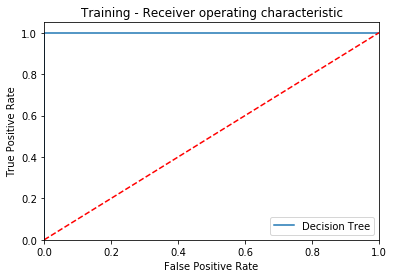

In [121]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Dt_roc_auc = roc_auc_score(y_train_smote, dtree.predict(x_train_smote))
fpr, tpr, thresholds = roc_curve(y_train_smote, dtree.predict_proba(x_train_smote)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree' % Dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Training - Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Dt_ROC')
plt.show()

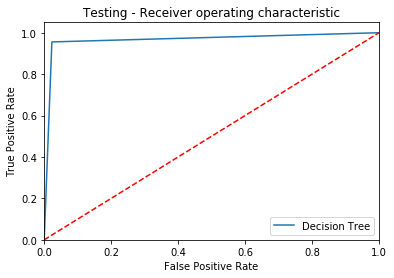

In [60]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Dt_roc_auc = roc_auc_score(y_test, dtree.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, dtree.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree' % Dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Testing - Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Dt_ROC')
plt.show()

In [122]:
cols = ['satisfaction_level', 'last_evaluation',
       'average_monthly_hours', 'exp_in_company', 'work_accident',
       'promotion_last_5years', 'role_RandD', 'role_accounting', 'role_hr',
       'role_management', 'role_marketing', 'role_product_mng', 'role_sales',
       'role_support', 'role_technical', 'salary_low', 'salary_medium',
       'projectCat_Low Project', 'projectCat_Medium Project']

In [123]:
for feature in zip(cols, dtree.feature_importances_):
    print(feature)

('satisfaction_level', 0.40691888483256017)
('last_evaluation', 0.09497355767513091)
('average_monthly_hours', 0.07182581385137027)
('exp_in_company', 0.31188854304267694)
('work_accident', 0.001965230818934673)
('promotion_last_5years', 0.0004826422791636589)
('role_RandD', 0.0009997771048928313)
('role_accounting', 0.0018302775440308188)
('role_hr', 0.001161582258332801)
('role_management', 0.000805285530402312)
('role_marketing', 0.0006291449929196814)
('role_product_mng', 0.0005290349635584569)
('role_sales', 0.0033725121165294066)
('role_support', 0.00253140451568016)
('role_technical', 0.0034311189590202494)
('salary_low', 0.0031180258687457814)
('salary_medium', 0.002987219906173117)
('projectCat_Low Project', 0.0027001532445577806)
('projectCat_Medium Project', 0.08784979049532021)


# Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(x_train, y_train)
y_pred = RF.predict(x_test)

In [51]:
RF_predictions = RF.predict(x_test)
score = accuracy_score(y_test ,RF_predictions)*100,"%"
print(score)

(98.4888888888889, '%')


In [52]:
predict_train = RF.predict(x_train_smote)
predict_test = RF.predict(x_test)

print("Accuracy on train is:",accuracy_score(y_train_smote,predict_train)*100,"%")
print("Accuracy on test is:",accuracy_score(y_test,predict_test)*100,"%")

Accuracy on train is: 98.25319308790384 %
Accuracy on test is: 98.4888888888889 %


In [53]:
# Predicting the train set results
y_train_pred = RF.predict(x_train_smote)
cm_train = confusion_matrix(y_train_smote, y_train_pred)

In [54]:
# Predicting the train set results
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_train_smote, y_train_pred))
print(classification_report(y_train_smote, y_train_pred))
print(accuracy_score(y_train_smote, y_train_pred))

[[7986    0]
 [ 279 7707]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      7986
           1       1.00      0.97      0.98      7986

    accuracy                           0.98     15972
   macro avg       0.98      0.98      0.98     15972
weighted avg       0.98      0.98      0.98     15972

0.9825319308790383


In [127]:
# Predicting the test set results
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[3433    9]
 [  59  999]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3442
           1       0.99      0.94      0.97      1058

    accuracy                           0.98      4500
   macro avg       0.99      0.97      0.98      4500
weighted avg       0.98      0.98      0.98      4500

0.9848888888888889


precision:0.9911,
sensitivity:0.9442,
specificity:0.9974,
F-Measure:0.1816,
G-Means:0.9704

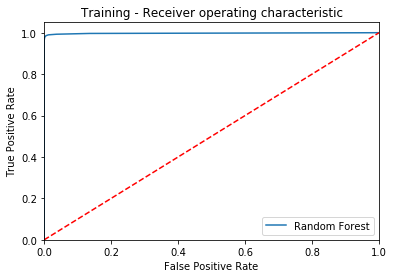

In [128]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
RF_roc_auc = roc_auc_score(y_train_smote, RF.predict(x_train_smote))
fpr, tpr, thresholds = roc_curve(y_train_smote, RF.predict_proba(x_train_smote)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest' % RF_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Training - Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

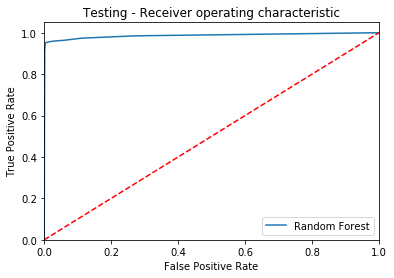

In [79]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
RF_roc_auc = roc_auc_score(y_test, RF.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, RF.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest' % RF_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Testing - Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

In [129]:
cols = ['satisfaction_level', 'last_evaluation',
       'average_monthly_hours', 'exp_in_company', 'work_accident',
       'promotion_last_5years', 'role_RandD', 'role_accounting', 'role_hr',
       'role_management', 'role_marketing', 'role_product_mng', 'role_sales',
       'role_support', 'role_technical', 'salary_low', 'salary_medium',
       'projectCat_Low Project', 'projectCat_Medium Project']

In [130]:
for feature in zip(cols,  RF.feature_importances_):
    print(feature)

('satisfaction_level', 0.35237217294939444)
('last_evaluation', 0.15956975787748806)
('average_monthly_hours', 0.18842532292836)
('exp_in_company', 0.16701026295473703)
('work_accident', 0.00892413840869712)
('promotion_last_5years', 0.001992828852177022)
('role_RandD', 0.0019651538540964844)
('role_accounting', 0.002263852451504065)
('role_hr', 0.001967135718322882)
('role_management', 0.001740586051504421)
('role_marketing', 0.0013627483422995236)
('role_product_mng', 0.001331475086291458)
('role_sales', 0.004042490919953438)
('role_support', 0.002754447376470476)
('role_technical', 0.004333699665123086)
('salary_low', 0.013027834124692198)
('salary_medium', 0.004264241537747743)
('projectCat_Low Project', 0.0427506559151662)
('projectCat_Medium Project', 0.03990119498597449)


# Naive Bayes

In [55]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

# Train the model using the training sets
gnb.fit(X,Y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [56]:
gnb_predictions = gnb.predict(x_test)

In [57]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, gnb_predictions)*100,"%")

Accuracy: 71.91111111111111 %


In [58]:
predict_train = gnb.predict(x_train_smote)
predict_test = gnb.predict(x_test)

print("Accuracy on train is:",accuracy_score(y_train_smote,predict_train)*100,"%")
print("Accuracy on test is:",accuracy_score(y_test,predict_test)*100,"%")

Accuracy on train is: 74.53042824943651 %
Accuracy on test is: 71.91111111111111 %


In [59]:
# Predicting the train set results
y_train_pred = gnb.predict(x_train_smote)
cm_train = confusion_matrix(y_train_smote, y_train_pred)

In [61]:
# Predicting the train set results
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_train_smote, y_train_pred))
print(classification_report(y_train_smote, y_train_pred))
print(accuracy_score(y_train_smote, y_train_pred))

[[5592 2394]
 [1674 6312]]
              precision    recall  f1-score   support

           0       0.77      0.70      0.73      7986
           1       0.73      0.79      0.76      7986

    accuracy                           0.75     15972
   macro avg       0.75      0.75      0.74     15972
weighted avg       0.75      0.75      0.74     15972

0.7453042824943651


In [135]:
# Predicting the test set results
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,gnb_predictions))
print(classification_report(y_test,gnb_predictions))
print(accuracy_score(y_test, gnb_predictions))

[[2386 1056]
 [ 208  850]]
              precision    recall  f1-score   support

           0       0.92      0.69      0.79      3442
           1       0.45      0.80      0.57      1058

    accuracy                           0.72      4500
   macro avg       0.68      0.75      0.68      4500
weighted avg       0.81      0.72      0.74      4500

0.7191111111111111


precision:0.446,
sensitivity:0.803,
specificity:0.6932,
F-Measure:0.8558,
G-Means:0.7462

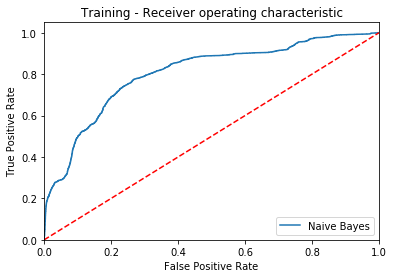

In [136]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

NB_roc_auc = roc_auc_score(y_train_smote, gnb.predict(x_train_smote))
fpr, tpr, thresholds = roc_curve(y_train_smote, gnb.predict_proba(x_train_smote)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Naive Bayes' % NB_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Training - Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

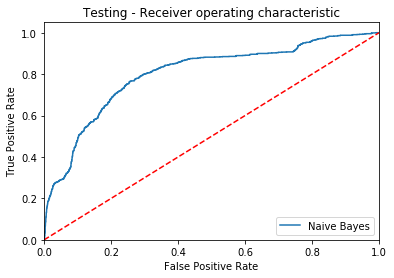

In [93]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

NB_roc_auc = roc_auc_score(y_test, gnb.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, gnb.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Naive Bayes' % NB_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Testing - Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

# k-Nearest Neighbour

In [62]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_smote, y_train_smote)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [63]:
y_pred = knn.predict(x_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")

Accuracy: 92.91111111111111 %


In [34]:
t = knn.fit(x_train_smote,y_train_smote)
print("knn Model Score" , ":" , t.score(x_train_smote, y_train_smote) , "," , 
      "Cross Validation Score" ,":" , t.score(x_test, y_test)*100,"%")

knn Model Score : 0.9675056348610067 , Cross Validation Score : 92.91111111111111 %


In [67]:
predict_train = knn.predict(x_train)
predict_test = knn.predict(x_test)

print("Accuracy on train is:",accuracy_score(y_train,predict_train)*100,"%")
print("Accuracy on test is:",accuracy_score(y_test,predict_test)*100,"%")

Accuracy on train is: 95.46666666666667 %
Accuracy on test is: 92.91111111111111 %


In [68]:
# Predicting the train set results
y_train_pred = knn.predict(x_train_smote)
cm_train = confusion_matrix(y_train_smote, y_train_pred)

In [69]:
# Predicting the train set results
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_train_smote, y_train_pred))
print(classification_report(y_train_smote, y_train_pred))
print(accuracy_score(y_train_smote, y_train_pred))

[[7565  421]
 [  98 7888]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      7986
           1       0.95      0.99      0.97      7986

    accuracy                           0.97     15972
   macro avg       0.97      0.97      0.97     15972
weighted avg       0.97      0.97      0.97     15972

0.9675056348610067


In [141]:
# Predicting the test set results
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3200  242]
 [  77  981]]
              precision    recall  f1-score   support

           0       0.98      0.93      0.95      3442
           1       0.80      0.93      0.86      1058

    accuracy                           0.93      4500
   macro avg       0.89      0.93      0.91      4500
weighted avg       0.94      0.93      0.93      4500



precision:0.802,
sensitivity:0.927,
specificity:0.927,
F-Measure:1.206,
G-Means:0.928

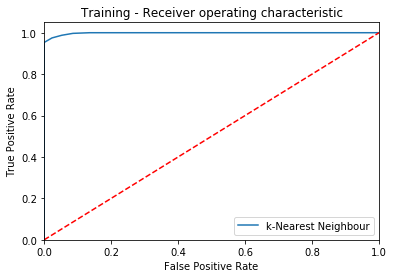

In [142]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

knn_roc_auc = roc_auc_score(y_train_smote, knn.predict(x_train_smote))
fpr, tpr, thresholds = roc_curve(y_train_smote, knn.predict_proba(x_train_smote)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='k-Nearest Neighbour' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Training - Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('knn_ROC')
plt.show()

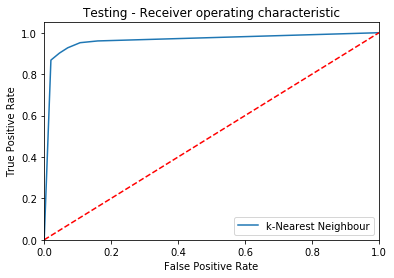

In [143]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

knn_roc_auc = roc_auc_score(y_test, knn.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='k-Nearest Neighbour' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Testing - Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('knn_ROC')
plt.show()

# FUZZYKNN

In [21]:
import pprint
import operator

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.base import BaseEstimator, ClassifierMixin

In [22]:
class FuzzyKNN(BaseEstimator, ClassifierMixin):
    def __init__(self, k=3, plot=False):
        self.k = k
        self.plot = plot
        
        
    def fit(self, X, y=None):
        self._check_params(X,y)
        self.X = X
        self.y = y
        
        self.xdim = len(self.X[0])
        self.n = len(y)
        
        classes = list(set(y))
        classes.sort()
        self.classes = classes
        
        self.df = pd.DataFrame(self.X)
        self.df['y'] = self.y
        
        self.memberships = self._compute_memberships()
        
        self.df['membership'] = self.memberships
        
        self.fitted_ = True
        return self
    
    
    def predict(self, X):
        if self.fitted_ == None:
            raise Exception('predict() called before fit()')
        else:
            m = 2
            y_pred = []
            
            for x in X:
                neighbors = self._find_k_nearest_neighbors(pd.DataFrame.copy(self.df), x)
                
                votes = {}
                for c in self.classes:
                    den = 0
                    for n in range(self.k):
                        dist = np.linalg.norm(x - neighbors.iloc[n,0:self.xdim])
                        den += 1 / (dist ** (2 / (m-1)))
                    
                    neighbors_votes = []
                    for n in range(self.k):
                        dist = np.linalg.norm(x - neighbors.iloc[n,0:self.xdim])
                        num = (neighbors.iloc[n].membership[c]) / (dist ** (2 / (m-1)))
                        
                        vote = num/den
                        neighbors_votes.append(vote)
                    votes[c] = np.sum(neighbors_votes)
                    
                pred = max(votes.items(), key=operator.itemgetter(1))[0]
                y_pred.append((pred, votes))
                
            return y_pred
        
        
    def score(self, X, y):
        if self.fitted_ == None:
            raise Exception('score() called before fit()')
        else:
            predictions = self.predict(X)
            y_pred = [t[0] for t in predictions]
            confidences = [t[1] for t in predictions]
            
            return accuracy_score(y_pred=y_pred, y_true=y)
    
        
    def _find_k_nearest_neighbors(self, df, x):
        X = df.iloc[:,0:self.xdim].values
        
        df['distances'] = [np.linalg.norm(X[i] - x) for i in range(self.n)]
        
        df.sort_values(by='distances', ascending=True, inplace=True)
        neighbors = df.iloc[0:self.k]
        
        return neighbors

                
    def _get_counts(self, neighbors):
        groups = neighbors.groupby('y')
        counts = {group[1]['y'].iloc[0]:group[1].count()[0] for group in groups}
        
        return counts
        
        
    def _compute_memberships(self):
        memberships = []
        for i in range(self.n):
            x = self.X[i]
            y = self.y[i]
            
            neighbors = self._find_k_nearest_neighbors(pd.DataFrame.copy(self.df), x)
            counts = self._get_counts(neighbors)
        
            membership = dict()
            for c in self.classes:
                try:
                    uci = 0.49 * (counts[c] / self.k)
                    if c == y:
                        uci += 0.51
                    membership[c] = uci
                except:
                    membership[c] = 0
                    
            memberships.append(membership)
        return memberships
        
        
    def _check_params(self, X, y):
        if type(self.k) != int:
            raise Exception('"k" should have type int')
        elif self.k >= len(y):
            raise Exception('"k" should be less than no of feature sets')
        elif self.k % 2 == 0:
            raise Exception('"k" should be odd')
            
        if type(self.plot) != bool:
            raise Exception('"plot" should have type bool')

In [24]:
custModel = FuzzyKNN()
custModel.fit(x_train_smote, y_train_smote)
print(cross_val_score(cv=5, estimator=custModel, X=x_test, y=y_test))

[0.87347392 0.86792453 0.86666667 0.86874305 0.85873192]


In [23]:
custModel = FuzzyKNN()
custModel.fit(x_train_smote, y_train_smote)
print(cross_val_score(cv=5, estimator=custModel, X=x_test, y=y_test))

[0.87444444 0.86666667 0.86666667 0.87       0.86      ]


In [24]:
print(custModel)

FuzzyKNN(k=3, plot=False)


In [25]:
custModel.score(x_train_smote, y_train_smote)

0.5

In [26]:
y_train_pred = custModel.predict(x_train_smote)

In [ ]:
# Predicting the train set results
y_train_pred = custModel.predict(x_train_smote)
cm_train = confusion_matrix(y_train_smote, y_train_pred)

In [27]:
# Predicting the train set results
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_train_smote, y_train_pred))
print(classification_report(y_train_smote, y_train_pred))
print(accuracy_score(y_train_smote, y_train_pred))

TypeError: '>' not supported between instances of 'int' and 'dict'

In [ ]:
# Predicting the test set results buat yg ni lpsni!!!!!!!
y_pred = custModel.predict(x_test)
cm_train = confusion_matrix(y_test, y_pred)

# Im doing

In [105]:
FuzzyKnn = KNeighborsClassifier()
custModel = FuzzyKNN()

skModel.fit(x_train_smote, y_train_smote)


print(cross_val_score(cv=5, estimator=FuzzyKnn, X=x_test, y=y_test))

[0.92563818 0.92119867 0.92222222 0.92658509 0.91434928]


In [104]:
skModel = KNeighborsClassifier().fit(x_train_smote, y_train_smote)


print(cross_val_score(estimator=skModel, X=x_test, y=y_test, cv=5))

[0.92563818 0.92119867 0.92222222 0.92658509 0.91434928]


# HR Test

In [3]:
HR = pd.read_excel("C:\\Users\\Z\\Desktop\\Master DS Sem 2\\Python project Student Performance\\kelam kabut DT\\HR NEW.xlsx")

In [4]:
HR.left.value_counts()

0    11428
1     3572
Name: left, dtype: int64

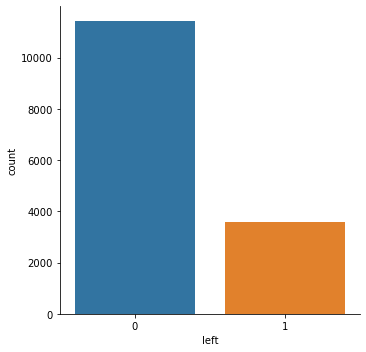

In [22]:
sns.factorplot(data=HR,kind='count',x='left')

In [20]:
from imblearn.over_sampling import SMOTE

In [19]:
smt = SMOTE()
x_train, y_train = smt.fit_sample(x_train, y_train)

In [21]:
np.bincount(y_train)

array([7986, 7986], dtype=int64)

# Drawing multiple ROC-Curves in a single plot

In [80]:
# Import the classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

In [81]:
# Instantiate the classfiers and make a list
classifiers = [LogisticRegression(random_state=1234), 
               GaussianNB(), 
               KNeighborsClassifier(), 
               DecisionTreeClassifier(random_state=1234),
               RandomForestClassifier(random_state=1234)]

In [82]:
# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

In [83]:
# Train the models and record the results
for cls in classifiers:
    model = cls.fit(x_train_smote, y_train_smote)
    yproba = model.predict_proba(x_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

In [84]:
# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

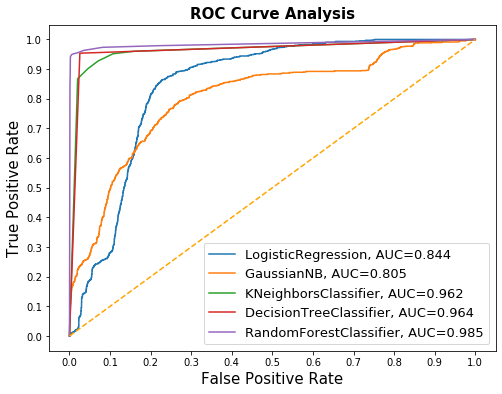

In [66]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

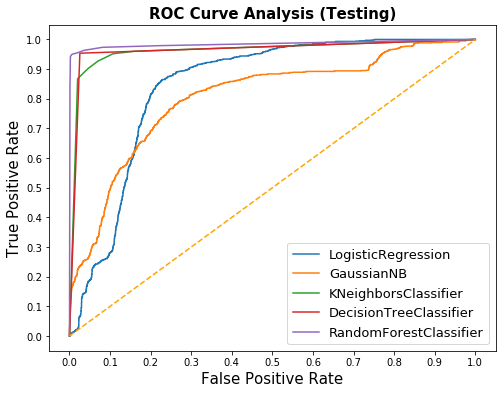

In [85]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis (Testing)', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

# Training Comparison ROC

In [75]:
# Train the models and record the results
for cls in classifiers:
    model = cls.fit(x_train_smote, y_train_smote)
    yproba = model.predict_proba(x_train_smote)[::,1]
    
    fpr, tpr, _ = roc_curve(y_train_smote,  yproba)
    auc = roc_auc_score(y_train_smote, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

In [76]:
# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

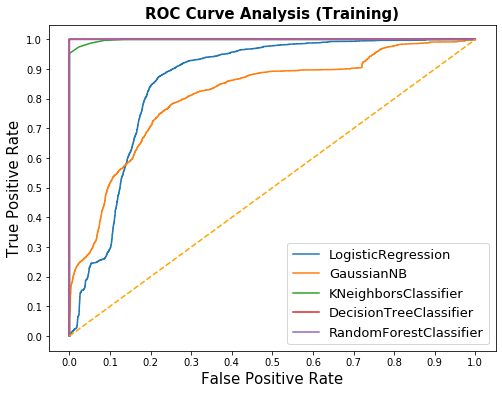

In [79]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis (Training)', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

# features importance logistic Regression

In [16]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
from sklearn.calibration import CalibratedClassifierCV

In [17]:

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

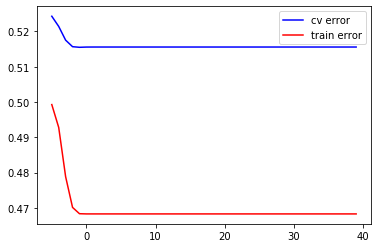

In [18]:
alpha=[10**x for x in np.arange(-5, 40, dtype=float)]
log_alpha=np.arange(-5,40)

cv_err=[]
train_err=[]
for a in alpha:
    clf=LogisticRegression(C=a, penalty='l2', class_weight='balanced')
    clf.fit(x_train_smote, y_train_smote)
    sig_clf=CalibratedClassifierCV(clf)
    sig_clf.fit(x_train_smote, y_train_smote)
    
    predict_y=sig_clf.predict_proba(x_test)
    cv_err.append(log_loss(y_test, predict_y))
    
    predict_y=sig_clf.predict_proba(x_train_smote)
    train_err.append(log_loss(y_train_smote, predict_y))

plt.plot(log_alpha, cv_err, label='cv error', c='b')
plt.plot(log_alpha, train_err, label='train error', c='r')
plt.legend()
plt.show()

In [19]:
alpha[np.argmin(cv_err)]

0.1

In [20]:
np.min(cv_err)

0.5154961485280032

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
accuracy_score(y_test, clf.predict(x_test))

0.7884444444444444

In [23]:
clf=LogisticRegression(C=alpha[np.argmin(cv_err)], penalty='l2', class_weight='balanced')
clf.fit(x_train, y_train)

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
clf.coef_.T

array([[-0.91562722],
       [-0.04275635],
       [-0.00619737],
       [ 1.09696283],
       [-0.53716557],
       [-0.2054966 ],
       [-0.12660662],
       [ 0.05352158],
       [ 0.08299065],
       [-0.05302217],
       [ 0.07381675],
       [ 0.02448963],
       [ 0.08165645],
       [ 0.07166108],
       [ 0.11256655],
       [ 0.96115876],
       [ 0.67133313],
       [ 0.18403333],
       [-0.30399393]])

In [25]:
np.abs(clf.coef_.T)

array([[0.91562722],
       [0.04275635],
       [0.00619737],
       [1.09696283],
       [0.53716557],
       [0.2054966 ],
       [0.12660662],
       [0.05352158],
       [0.08299065],
       [0.05302217],
       [0.07381675],
       [0.02448963],
       [0.08165645],
       [0.07166108],
       [0.11256655],
       [0.96115876],
       [0.67133313],
       [0.18403333],
       [0.30399393]])

In [178]:
HR.columns

Index(['satisfaction_level', 'last_evaluation', 'average_monthly_hours',
       'exp_in_company', 'work_accident', 'left', 'promotion_last_5years',
       'role_RandD', 'role_accounting', 'role_hr', 'role_management',
       'role_marketing', 'role_product_mng', 'role_sales', 'role_support',
       'role_technical', 'salary_low', 'salary_medium',
       'projectCat_Low Project', 'projectCat_Medium Project', 'Intercept'],
      dtype='object')

In [179]:
cols = ['satisfaction_level', 'last_evaluation', 'average_monthly_hours',
       'exp_in_company', 'work_accident', 'promotion_last_5years',
       'role_RandD', 'role_accounting', 'role_hr', 'role_management',
       'role_marketing', 'role_product_mng', 'role_sales', 'role_support',
       'role_technical', 'salary_low', 'salary_medium',
       'projectCat_Low Project', 'projectCat_Medium Project']

In [187]:
cols  = ['satisfaction_level',
'last_evaluation',
'average_monthly_hours',
'exp_in_company',
'work_accident',
'promotion_last_5years',
'role_RandD',
'role_accounting',
'role_hr',
'role_management',
'role_marketing',
'role_product_mng',
'role_sales',
'role_support',
'role_technical',
'salary_low',
'salary_medium',
'projectCat_Low Project',
'projectCat_Medium Project']

In [188]:
np.array([cols[1:-1]]).T

array([['last_evaluation'],
       ['average_monthly_hours'],
       ['exp_in_company'],
       ['work_accident'],
       ['promotion_last_5years'],
       ['role_RandD'],
       ['role_accounting'],
       ['role_hr'],
       ['role_management'],
       ['role_marketing'],
       ['role_product_mng'],
       ['role_sales'],
       ['role_support'],
       ['role_technical'],
       ['salary_low'],
       ['salary_medium'],
       ['projectCat_Low Project']], dtype='<U22')

# smote

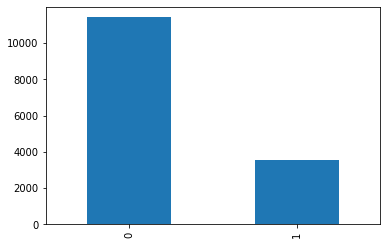

In [9]:
HR['left'].value_counts().plot.bar()

In [10]:
print('Proportion of the classes in the data:')
print(HR['left'].value_counts() / len(HR))

Proportion of the classes in the data:
0    0.761867
1    0.238133
Name: left, dtype: float64


In [13]:
#Encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Create a label encoder object
le = LabelEncoder()

In [14]:
# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
for col in HR.columns[1:]:
    if HR[col].dtype == 'object':
        if len(list(HR[col].unique())) <= 2:
            le.fit(HR[col])
            HR[col] = le.transform(HR[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

0 columns were label encoded.


In [15]:
# convert rest of categorical variable into dummy
HR = pd.get_dummies(HR, drop_first=True)

print(HR.shape)
HR.head()

(15000, 20)


,satisfaction_level,last_evaluation,average_monthly_hours,exp_in_company,work_accident,left,promotion_last_5years,role_RandD,role_accounting,role_hr,role_management,role_marketing,role_product_mng,role_sales,role_support,role_technical,salary_low,salary_medium,ProjectCat_Low Project,ProjectCat_Medium Project
0,0.38,0.53,157,3.0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0
1,0.80,0.86,262,5.0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1
2,0.11,0.88,272,4.0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,0.72,0.87,223,5.0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1
4,0.37,0.52,159,3.0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0


In [16]:
X = np.array(HR.loc[:, HR.columns != 'left'])
y = np.array(HR.loc[:, HR.columns == 'left']).reshape(-1, 1)

In [17]:
# standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [18]:
# split into training and testing datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 2, shuffle = True, stratify = y)

In [19]:
# import logistic regression model and accuracy_score metric
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf = LogisticRegression(solver = 'lbfgs')

In [20]:
# fit the model
clf.fit(X_train, y_train.ravel())

# prediction for training dataset
train_pred = clf.predict(X_train)

# prediction for testing dataset
test_pred = clf.predict(X_test)

In [21]:
print('Accuracy score for Training Dataset = ', accuracy_score(train_pred, y_train))
print('Accuracy score for Testing Dataset = ', accuracy_score(test_pred, y_test))

Accuracy score for Training Dataset =  0.7670646766169155
Accuracy score for Testing Dataset =  0.7684848484848484


In [22]:
print('Confusion Matrix - Training Dataset')
print(pd.crosstab(y_train.ravel(), train_pred, rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Training Dataset
Predicted     0     1    All
True                        
0          7023   634   7657
1          1707   686   2393
All        8730  1320  10050


Now let's interpret the results.

1707 out of 2393 instances which belong to class 1 have been classifed as class 0.

In [23]:
1707/2393

0.7133305474300041

That is a whopping 71%! We are classifying 71% of the LEFT cases as not LEFT. This is going to cost some serious losses to the employee turnover company. You can observe this similarly in the confusion matrix of the Testing Dataset.

The higher accuracy is not due to correct classification. The model has predicted the majority class for almost all the examples. And since about 71.3% of the examples actually belong to this class, it leads to such high accuracy scores.

In [24]:
print('Confusion Matrix - Testing Dataset')
print(pd.crosstab(y_test.ravel(), test_pred.ravel(), rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Testing Dataset
Predicted     0    1   All
True                      
0          3428  343  3771
1           803  376  1179
All        4231  719  4950


In [25]:
803/1179

0.6810856658184903

803 out of 1179 instances which belong to class 1 have been classifed as class 0. We are missing about 68% of the left cases.

# Using SMOTE

In [26]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 33)

In [27]:
X_train_new, y_train_new = sm.fit_sample(X_train, y_train.ravel())

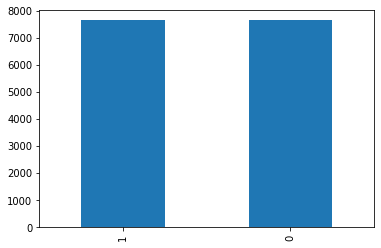

In [28]:
# observe that data has been balanced
pd.Series(y_train_new).value_counts().plot.bar()

In [60]:
# fit the model
clf.fit(X_train_new, y_train_new)

# prediction for Training data
train_pred_sm = clf.predict(X_train_new)

# prediction for Testing data
test_pred_sm = clf.predict(X_test)

In [61]:
print('Accuracy score for Training Dataset = ', accuracy_score(train_pred_sm, y_train_new))
print('Accuracy score for Testing Dataset = ', accuracy_score(test_pred_sm, y_test))

Accuracy score for Training Dataset =  0.823298942144443
Accuracy score for Testing Dataset =  0.781010101010101


In [31]:
print('Confusion Matrix - Training Dataset')
print(pd.crosstab(y_train_new, train_pred_sm, rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Training Dataset
Predicted     0     1    All
True                        
0          5874  1783   7657
1           923  6734   7657
All        6797  8517  15314


In [32]:
923/7657

0.12054329371816638

923 out of 7657 fraud cases have been classified as not left. This is a mere 12% compared to the previous 68%.

A vast improvement!

Same is the case with the Testing Dataset.

In [33]:
print('Confusion Matrix - Testing Dataset')
print(pd.crosstab(y_test.ravel(), test_pred_sm, rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Testing Dataset
Predicted     0     1   All
True                       
0          2820   951  3771
1           133  1046  1179
All        2953  1997  4950


In [34]:
133/1179

0.11280746395250212

Roughly 11% of the left classes have been classified as not left.

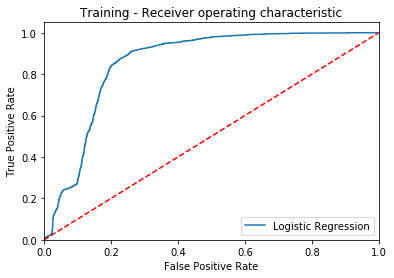

In [63]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

knn_roc_auc = roc_auc_score(y_train_new, clf.predict(X_train_new))
fpr, tpr, thresholds = roc_curve(y_train_new, clf.predict_proba(X_train_new)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Training - Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

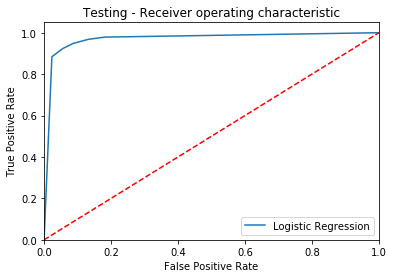

In [64]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

knn_roc_auc = roc_auc_score(y_test, knn.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Testing - Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.externals.six import StringIO 
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, roc_curve, auc
from sklearn.model_selection import cross_val_score
from IPython.display import Image 
import pandas as pd
import numpy as np

In [65]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train_new, y_train_new)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [66]:
# fit the model
dtree.fit(X_train_new, y_train_new)

# prediction for Training data
train_pred_sm = dtree.predict(X_train_new)

# prediction for Testing data
test_pred_sm = clf.predict(X_test)

In [67]:
print('Accuracy score for Training Dataset = ', accuracy_score(train_pred_sm, y_train_new))
print('Accuracy score for Testing Dataset = ', accuracy_score(test_pred_sm, y_test))

Accuracy score for Training Dataset =  1.0
Accuracy score for Testing Dataset =  0.781010101010101


In [40]:
print('Confusion Matrix - Training Dataset')
print(pd.crosstab(y_train_new, train_pred_sm, rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Training Dataset
Predicted     0     1    All
True                        
0          7657     0   7657
1             0  7657   7657
All        7657  7657  15314


In [41]:
print('Confusion Matrix - Testing Dataset')
print(pd.crosstab(y_test.ravel(), test_pred_sm, rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Testing Dataset
Predicted     0     1   All
True                       
0          2820   951  3771
1           133  1046  1179
All        2953  1997  4950


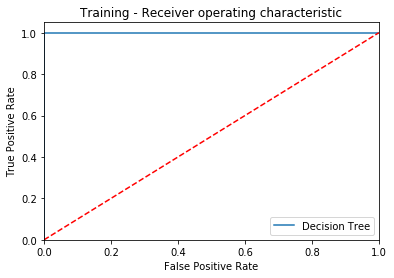

In [68]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

knn_roc_auc = roc_auc_score(y_train_new, dtree.predict(X_train_new))
fpr, tpr, thresholds = roc_curve(y_train_new, dtree.predict_proba(X_train_new)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Training - Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

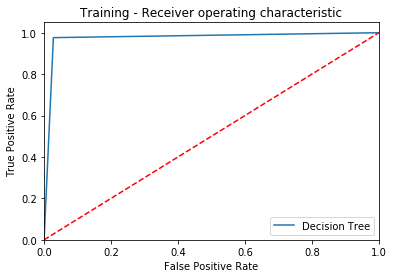

In [69]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

knn_roc_auc = roc_auc_score(y_test, dtree.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Training - Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)

In [71]:
# fit the model
RF.fit(X_train_new, y_train_new)

# prediction for Training data
train_pred_sm = RF.predict(X_train_new)

# prediction for Testing data
test_pred_sm = RF.predict(X_test)

In [72]:
print('Accuracy score for Training Dataset = ', accuracy_score(train_pred_sm, y_train_new))
print('Accuracy score for Testing Dataset = ', accuracy_score(test_pred_sm, y_test))

Accuracy score for Training Dataset =  0.9994776021940708
Accuracy score for Testing Dataset =  0.9874747474747475


In [45]:
print('Confusion Matrix - Training Dataset')
print(pd.crosstab(y_train_new, train_pred_sm, rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Training Dataset
Predicted     0     1    All
True                        
0          7656     1   7657
1             7  7650   7657
All        7663  7651  15314


In [46]:
print('Confusion Matrix - Testing Dataset')
print(pd.crosstab(y_test.ravel(), test_pred_sm, rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Testing Dataset
Predicted     0     1   All
True                       
0          3748    23  3771
1            39  1140  1179
All        3787  1163  4950


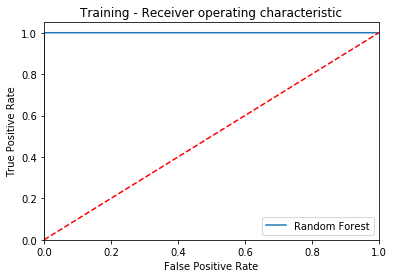

In [73]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

knn_roc_auc = roc_auc_score(y_train_new, RF.predict(X_train_new))
fpr, tpr, thresholds = roc_curve(y_train_new, RF.predict_proba(X_train_new)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Training - Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

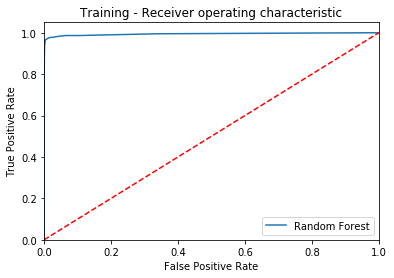

In [74]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

knn_roc_auc = roc_auc_score(y_test, RF.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, RF.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Training - Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Naive Bayes

In [75]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

# Train the model using the training sets
gnb.fit(X,y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [76]:
# fit the model
gnb.fit(X_train_new, y_train_new)

# prediction for Training data
train_pred_sm = gnb.predict(X_train_new)

# prediction for Testing data
test_pred_sm = gnb.predict(X_test)

In [77]:
print('Accuracy score for Training Dataset = ', accuracy_score(train_pred_sm, y_train_new))
print('Accuracy score for Testing Dataset = ', accuracy_score(test_pred_sm, y_test))

Accuracy score for Training Dataset =  0.6876061120543294
Accuracy score for Testing Dataset =  0.5684848484848485


In [52]:
print('Confusion Matrix - Training Dataset')
print(pd.crosstab(y_train_new, train_pred_sm, rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Training Dataset
Predicted     0      1    All
True                         
0          3758   3899   7657
1           885   6772   7657
All        4643  10671  15314


In [53]:
print('Confusion Matrix - Testing Dataset')
print(pd.crosstab(y_test.ravel(), test_pred_sm, rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Testing Dataset
Predicted     0     1   All
True                       
0          1766  2005  3771
1           131  1048  1179
All        1897  3053  4950


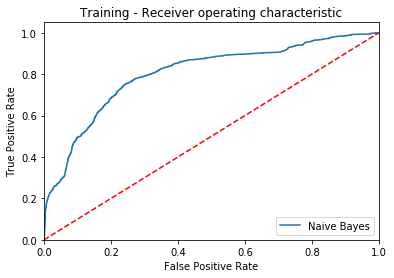

In [78]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

knn_roc_auc = roc_auc_score(y_train_new, gnb.predict(X_train_new))
fpr, tpr, thresholds = roc_curve(y_train_new, gnb.predict_proba(X_train_new)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Naive Bayes' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Training - Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

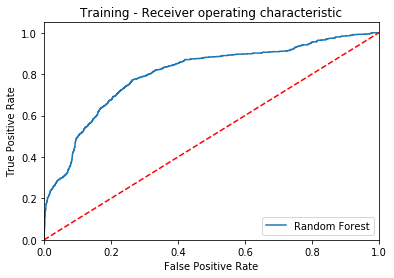

In [79]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

knn_roc_auc = roc_auc_score(y_test, gnb.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, gnb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Training - Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# KNN

In [80]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [81]:
# fit the model
knn.fit(X_train_new, y_train_new)

# prediction for Training data
train_pred_sm = knn.predict(X_train_new)

# prediction for Testing data
test_pred_sm = knn.predict(X_test)

In [82]:
print('Accuracy score for Training Dataset = ', accuracy_score(train_pred_sm, y_train_new))
print('Accuracy score for Testing Dataset = ', accuracy_score(test_pred_sm, y_test))

Accuracy score for Training Dataset =  0.9673501371294241
Accuracy score for Testing Dataset =  0.9216161616161617


In [58]:
print('Confusion Matrix - Training Dataset')
print(pd.crosstab(y_train_new, train_pred_sm, rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Training Dataset
Predicted     0     1    All
True                        
0          7243   414   7657
1            86  7571   7657
All        7329  7985  15314


In [59]:
print('Confusion Matrix - Testing Dataset')
print(pd.crosstab(y_test.ravel(), test_pred_sm, rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Testing Dataset
Predicted     0     1   All
True                       
0          3444   327  3771
1            61  1118  1179
All        3505  1445  4950


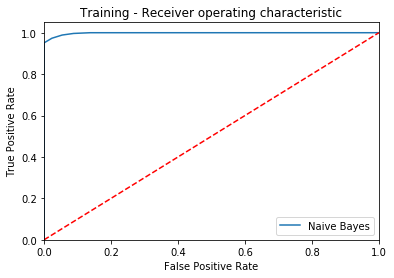

In [83]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

knn_roc_auc = roc_auc_score(y_train_new, knn.predict(X_train_new))
fpr, tpr, thresholds = roc_curve(y_train_new, knn.predict_proba(X_train_new)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Naive Bayes' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Training - Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

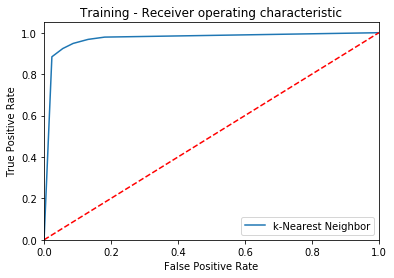

In [84]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

knn_roc_auc = roc_auc_score(y_test, knn.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='k-Nearest Neighbor' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Training - Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Testing ROC

In [98]:
# Import the classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

In [99]:
# Instantiate the classfiers and make a list
classifiers = [LogisticRegression(random_state=1234), 
               GaussianNB(), 
               KNeighborsClassifier(), 
               DecisionTreeClassifier(random_state=1234),
               RandomForestClassifier(random_state=1234)]

In [100]:
# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

In [89]:
# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train_new, y_train_new)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

In [90]:
# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

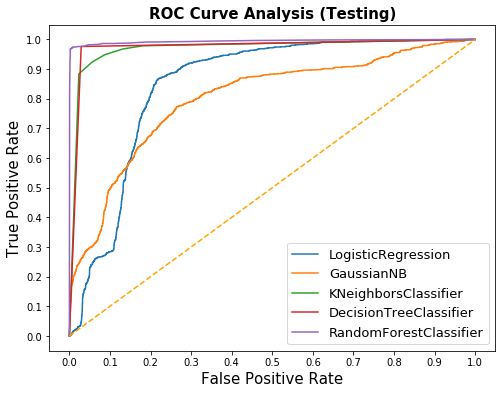

In [91]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis (Testing)', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

# Training ROC

In [101]:
# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train_new, y_train_new)
    yproba = model.predict_proba(X_train_new)[::,1]
    
    fpr, tpr, _ = roc_curve(y_train_new,yproba)
    auc = roc_auc_score(y_train_new, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

In [102]:
# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

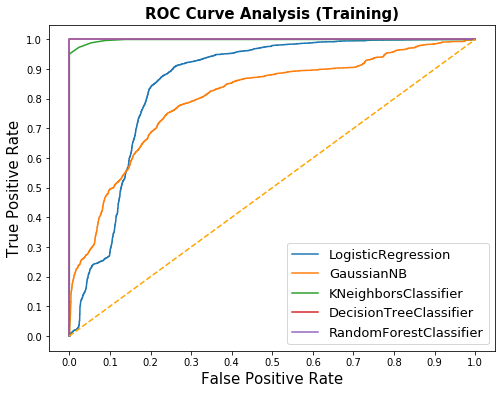

In [103]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis (Training)', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()